In [92]:
import pandas as pd
from plotnine import *

## Working with Data of Global Indicators - Gapminder

"Gapminder identifies systematic misconceptions about important global trends and proportions and uses reliable data to develop easy to understand teaching materials to rid people of their misconceptions."


## Task 1

Below is a plot of a visualization in Gapminder (the default/starting one actually). Look it over and take note of the variables being visualized.


<img src = "gapminder_pic.png"
        width = "800"
        height = "300">

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

    For the year 2010:

    - Income is being mapped to X.
    - Life expectancy is being mapped to Y.
    - Population is being mapped to size. 
    - World Region is being mapped to fill/color.
    
    It also appears they are segmenting the scatter plot into 4 income levels. Additionally, it appears they are noting income is per person (GDP/capita, PPPS inflation-adjusted). 

2. Import the q1data.csv dataset.

In [93]:
q1data = pd.read_csv('Data/q1data.csv')
q1data.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best you can using plotnine.

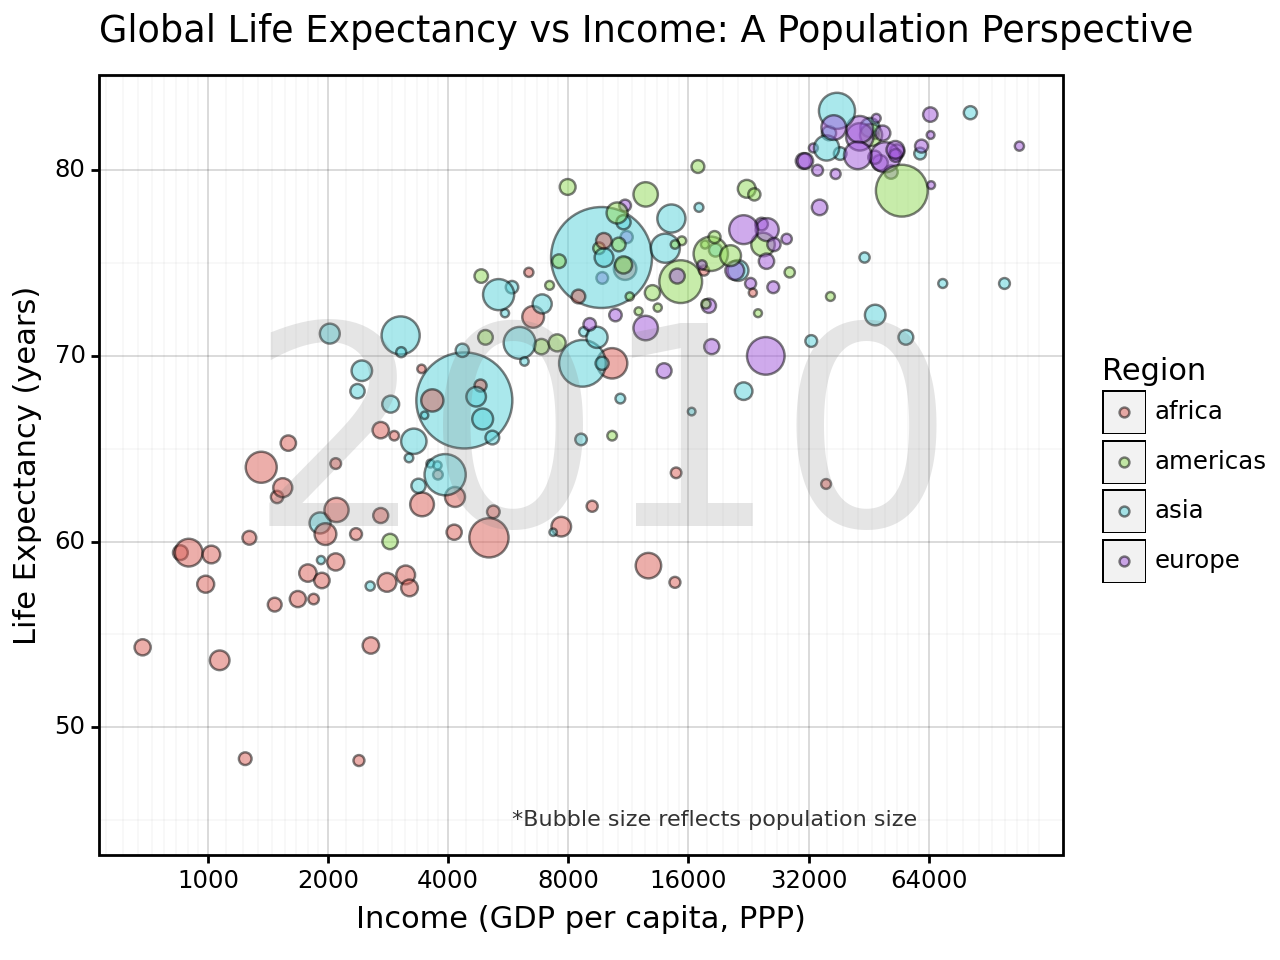

<Figure Size: (640 x 480)>

In [94]:
# Create the plot with a log10 scale for the x-axis to make it similar to Gapminder Scale
# Sources Used:
# https://stackoverflow.com/questions/59024019/add-text-to-figure-using-pythons-plotnine
# https://plotnine.org/reference/scale_x_log10.html
# https://plotnine.org/reference/guide.html
# https://f0nzie.github.io/rmarkdown-python-plotnine/scales-and-zooming.html
# https://plotnine.org/reference/scale_size_continuous.html
(ggplot(q1data.dropna(), aes(x='income', y='life_exp', size='population', fill='four_regions')) +
    geom_point(alpha = 0.5) +
    scale_size_continuous(range=[1, 20], guide = False) + # Change bubble size to look like Gapminder Plot
    theme_linedraw() + 
    labs(x='Income (GDP per capita, PPP)', y='Life Expectancy (years)', 
         fill='Region',
         title = "Global Life Expectancy vs Income: A Population Perspective") +  
    scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) + # See top comment
    annotate("text", x=9700, y=65, label="2010", 
             size=100, color="grey", alpha=0.2, ha='center') + # Add year like Gapminder plot
    annotate("text", x=60000, y=45, label="*Bubble size reflects population size", 
             size=8, color="black", alpha=0.8, ha='right') + # Add bubble size descriptor in lieu of population toggle 
    theme(legend_position='right'))

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

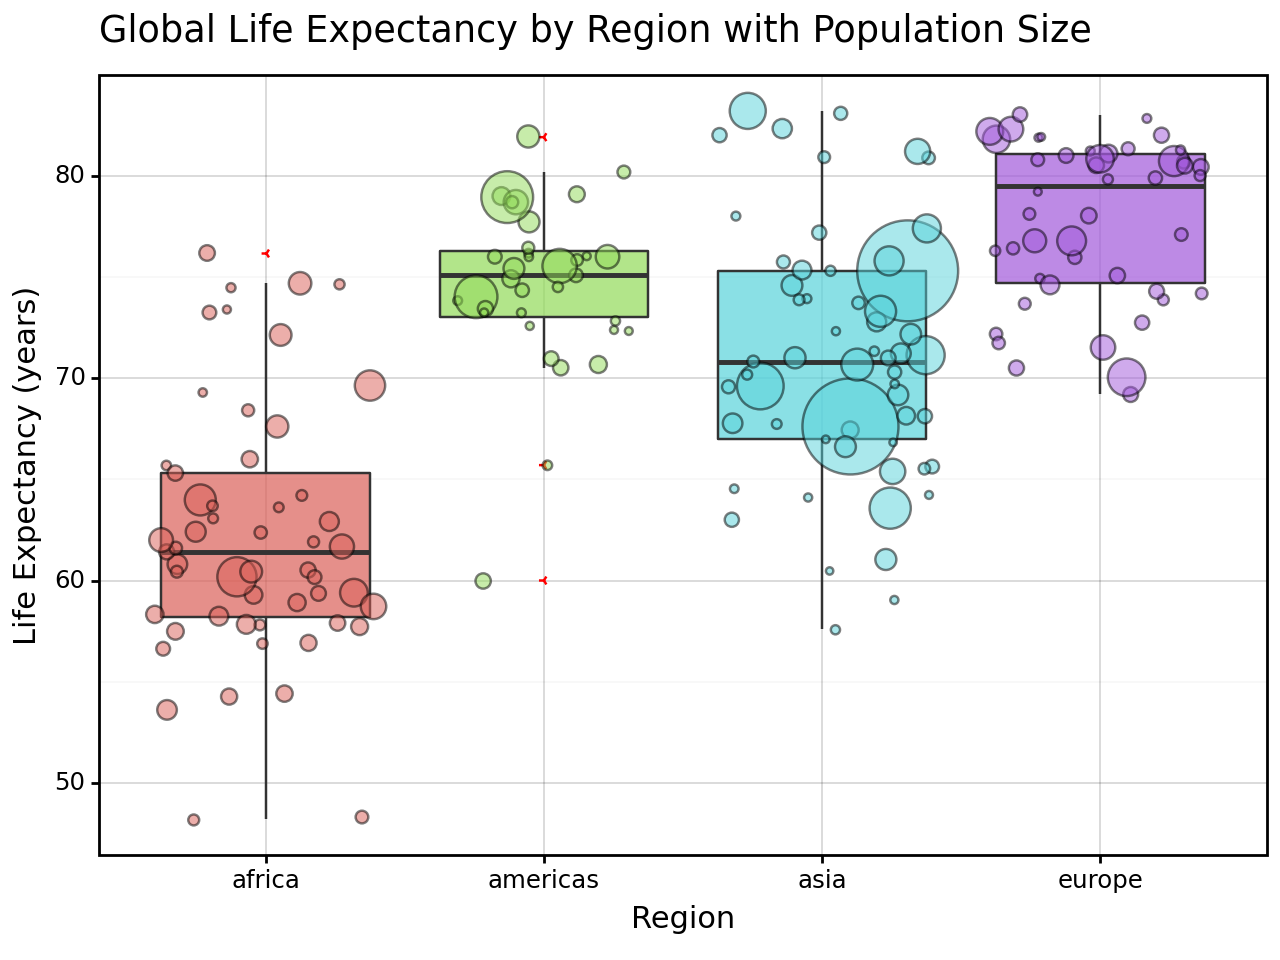

<Figure Size: (640 x 480)>

In [95]:
# Create the boxplot showing life expectancy by region
(ggplot(q1data.dropna(), aes(x='four_regions', y='life_exp', fill='four_regions')) + 
    geom_boxplot(alpha=0.7, outlier_color="red", outlier_shape = "3") + 
    geom_jitter(aes(size='population'), color="black", alpha=0.5) + # Use geom_gitter of point, adds variation
    scale_size_continuous(range=[1, 20], guide=False) + 
    theme_linedraw() + 
    labs(x='Region', y='Life Expectancy (years)', 
         title="Global Life Expectancy by Region with Population Size") + 
    theme(legend_position='none'))

This approach is beneficial for visualizing the data because it combines two types of insights: the
boxplot shows the distribution of life expectancy within each region (medians, quartiles, and outliers)
while the overlaid points represent individual countries, with the size of the points indicating
population. If this visualization only had the boxplots, we would lose the ability to see the relationship
between size and the remainder of the variables. This allows for viewing both the overall trends (via
the boxplot) and how population size plays a role within those trends. However, it could be problematic if
there is a lot of overlap or clustering, making it hard to distinguish between the different points.
Additionally, the larger bubbles may obscure important details of the boxplot, especially in regions with
many data points, reducing clarity.

## Task 2

Below is another plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.


<img src = "task2_pic.png"
        width = "800"
        height = "300">

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

    For the year 1997:

    - Exports(% of GDP) is being mapped to X.
    - Imports(% of GDP) is being mapped to Y.
    - Energy Use is being mapped to size. 
    - World Region is being mapped to fill/color.

2. Import the q1data.csv dataset.

In [96]:
q2data = pd.read_csv('Data/q2data.csv')
q2data = q2data.dropna()

# Define a function to convert values like '12.4k' to 12400
def convert_k_to_numeric(value):
    if isinstance(value, str) and 'k' in value:
        # Remove the 'k' and multiply the number by 1000
        return float(value.replace('k', '')) * 1000
    return value  # Return the value as is if it doesn't need conversion

# Apply the function to the 'energy' column
q2data['energy'] = q2data['energy'].apply(convert_k_to_numeric).astype(int)

# Display the updated column
q2data['energy']

1       427
2       825
6      1660
7       610
9      5550
       ... 
198    2080
200    2250
201     340
204     617
205     845
Name: energy, Length: 127, dtype: int64

3. Recreate the plot as best you can using plotnine.


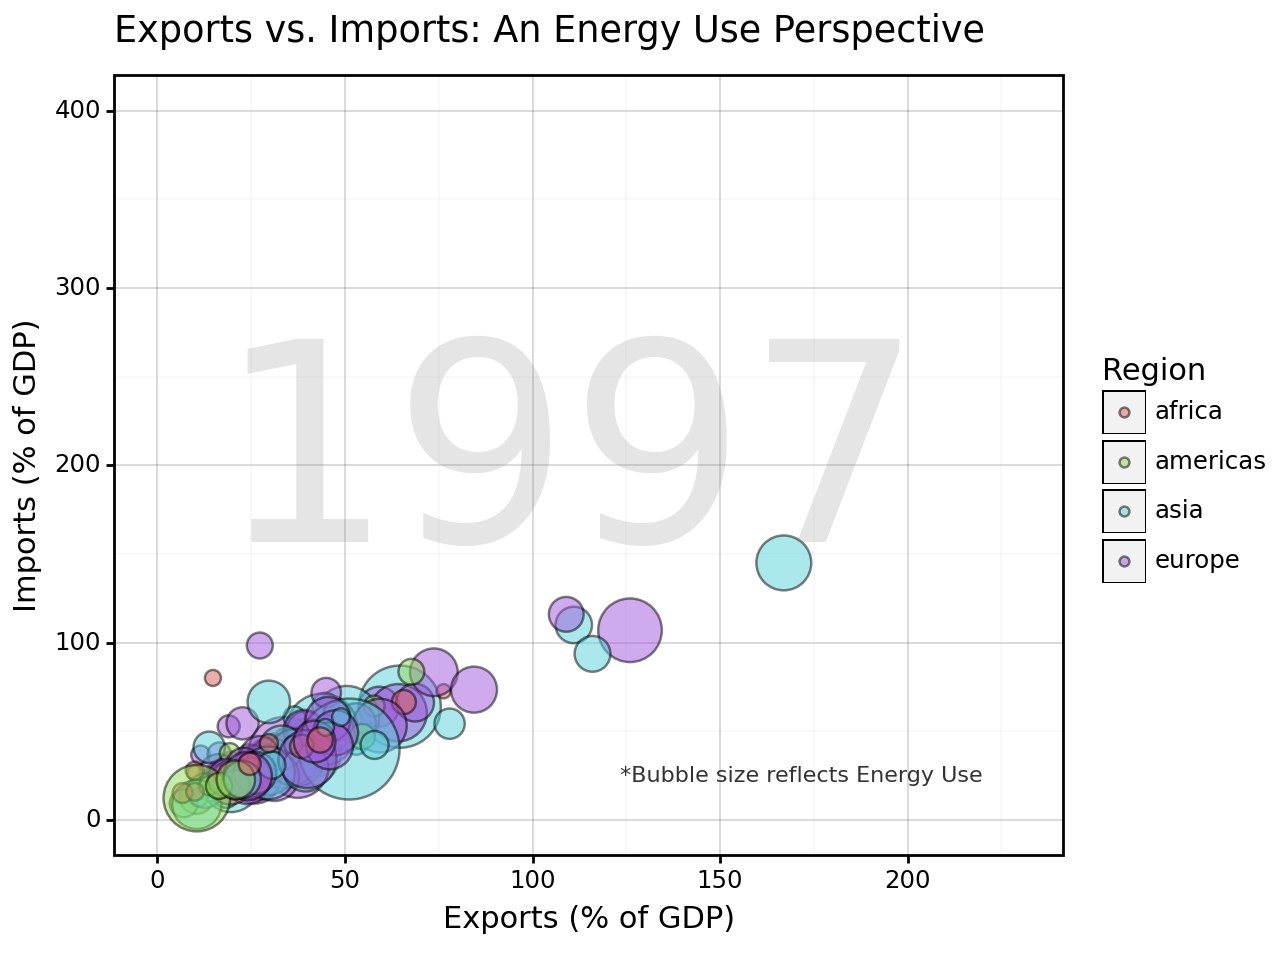

<Figure Size: (640 x 480)>

In [97]:
(ggplot(q2data, aes(x='exports', y='imports', size='energy', fill='four_regions')) +
    geom_point(alpha = 0.5) +
    scale_size_continuous(range=[1, 20], guide = False)  + # Change bubble size to look like Gapminder Plot
    theme_linedraw() + 
    labs(x='Exports (% of GDP)', y='Imports (% of GDP)', 
         fill='Region',
         title = "Exports vs. Imports: An Energy Use Perspective") +
    ylim(0, 400) + # Match Y axis to the Gapminder Plot
    xlim(0, 230) + # Match X axis to the Gapminder Plot
    annotate("text", x=110, y=200, label="1997", 
             size=100, color="grey", alpha=0.2, ha='center') + # Add year like Gapminder plot
    annotate("text", x=220, y=25, label="*Bubble size reflects Energy Use", 
             size=8, color="black", alpha=0.8, ha='right') + # Add bubble size descriptor in lieu of energy toggle 
    theme(legend_position='right'))

4. 

In [ ]:
# Create the boxplot showing life expectancy by region
(ggplot(q1data.dropna(), aes(x='four_regions', y='life_exp', fill='four_regions')) + 
    geom_boxplot(alpha=0.7, outlier_color="red", outlier_shape = "3") + 
    geom_jitter(aes(size='population'), color="black", alpha=0.5) + # Use geom_gitter of point, adds variation
    scale_size_continuous(range=[1, 20], guide=False) + 
    theme_linedraw() + 
    labs(x='Region', y='Life Expectancy (years)', 
         title="Global Life Expectancy by Region with Population Size") + 
    theme(legend_position='none'))